In [1]:
#!/usr/bin/env python
'''
# simRMsynth
# Simulates Stokes Q,U(freq) data 
# based on input frequency information - first ***INPUT*** cell 2
# calculates theoretical RMSF, Faraday spectrum 
# can also provide extra parameters for Stokes Q,U(freq) data 
# to simulate instrumental effects - second ***INPUT*** cell 6 
'''
import numpy as np
import pylab as plt

In [2]:
#***INPUT*** options for observations and RMsynth (units - MHz)
FREQLO = 109.8635 #minimum observing frequency (MHz)
FREQHI = 187.9885 #maximum observing frequency (MHz)
NCHAN = 400.      #number of frequency channels
#Faraday spectrum
PHIMIN = -20.     #minimum Faraday depth to calculate 
PHIMAX = 20.      #minimum Faraday depth to calculate 
PHIRES = 0.001    #resolution in Faraday depth to calculate 
#INPUT Source RM
RM = 3.           #source RM
print "Source RM = %f"%(RM)

Source RM = 3.000000


* Frequency range = 109.863500 - 187.988500 MHz
Frequency resolution = 0.195802 MHz
* Wavelength range = 1.594738 - 2.728772 m
Wavelength squared range = 2.543190 - 7.446197 m^2
Wavelength squared average = 4.353289 m^2
* FWHM of RMSF = 0.775035 rad/m^2
Maximum RM scale ~1.235296 rad/m^2
Maximum RM accessible is 65.432301 (lower limit), 162.548621 (average) rad/m**2
* Faraday spectrum range = -20.000000 - 20.000000 rad/m^2
Faraday spectrum resolution = 0.001000 rad/m^2


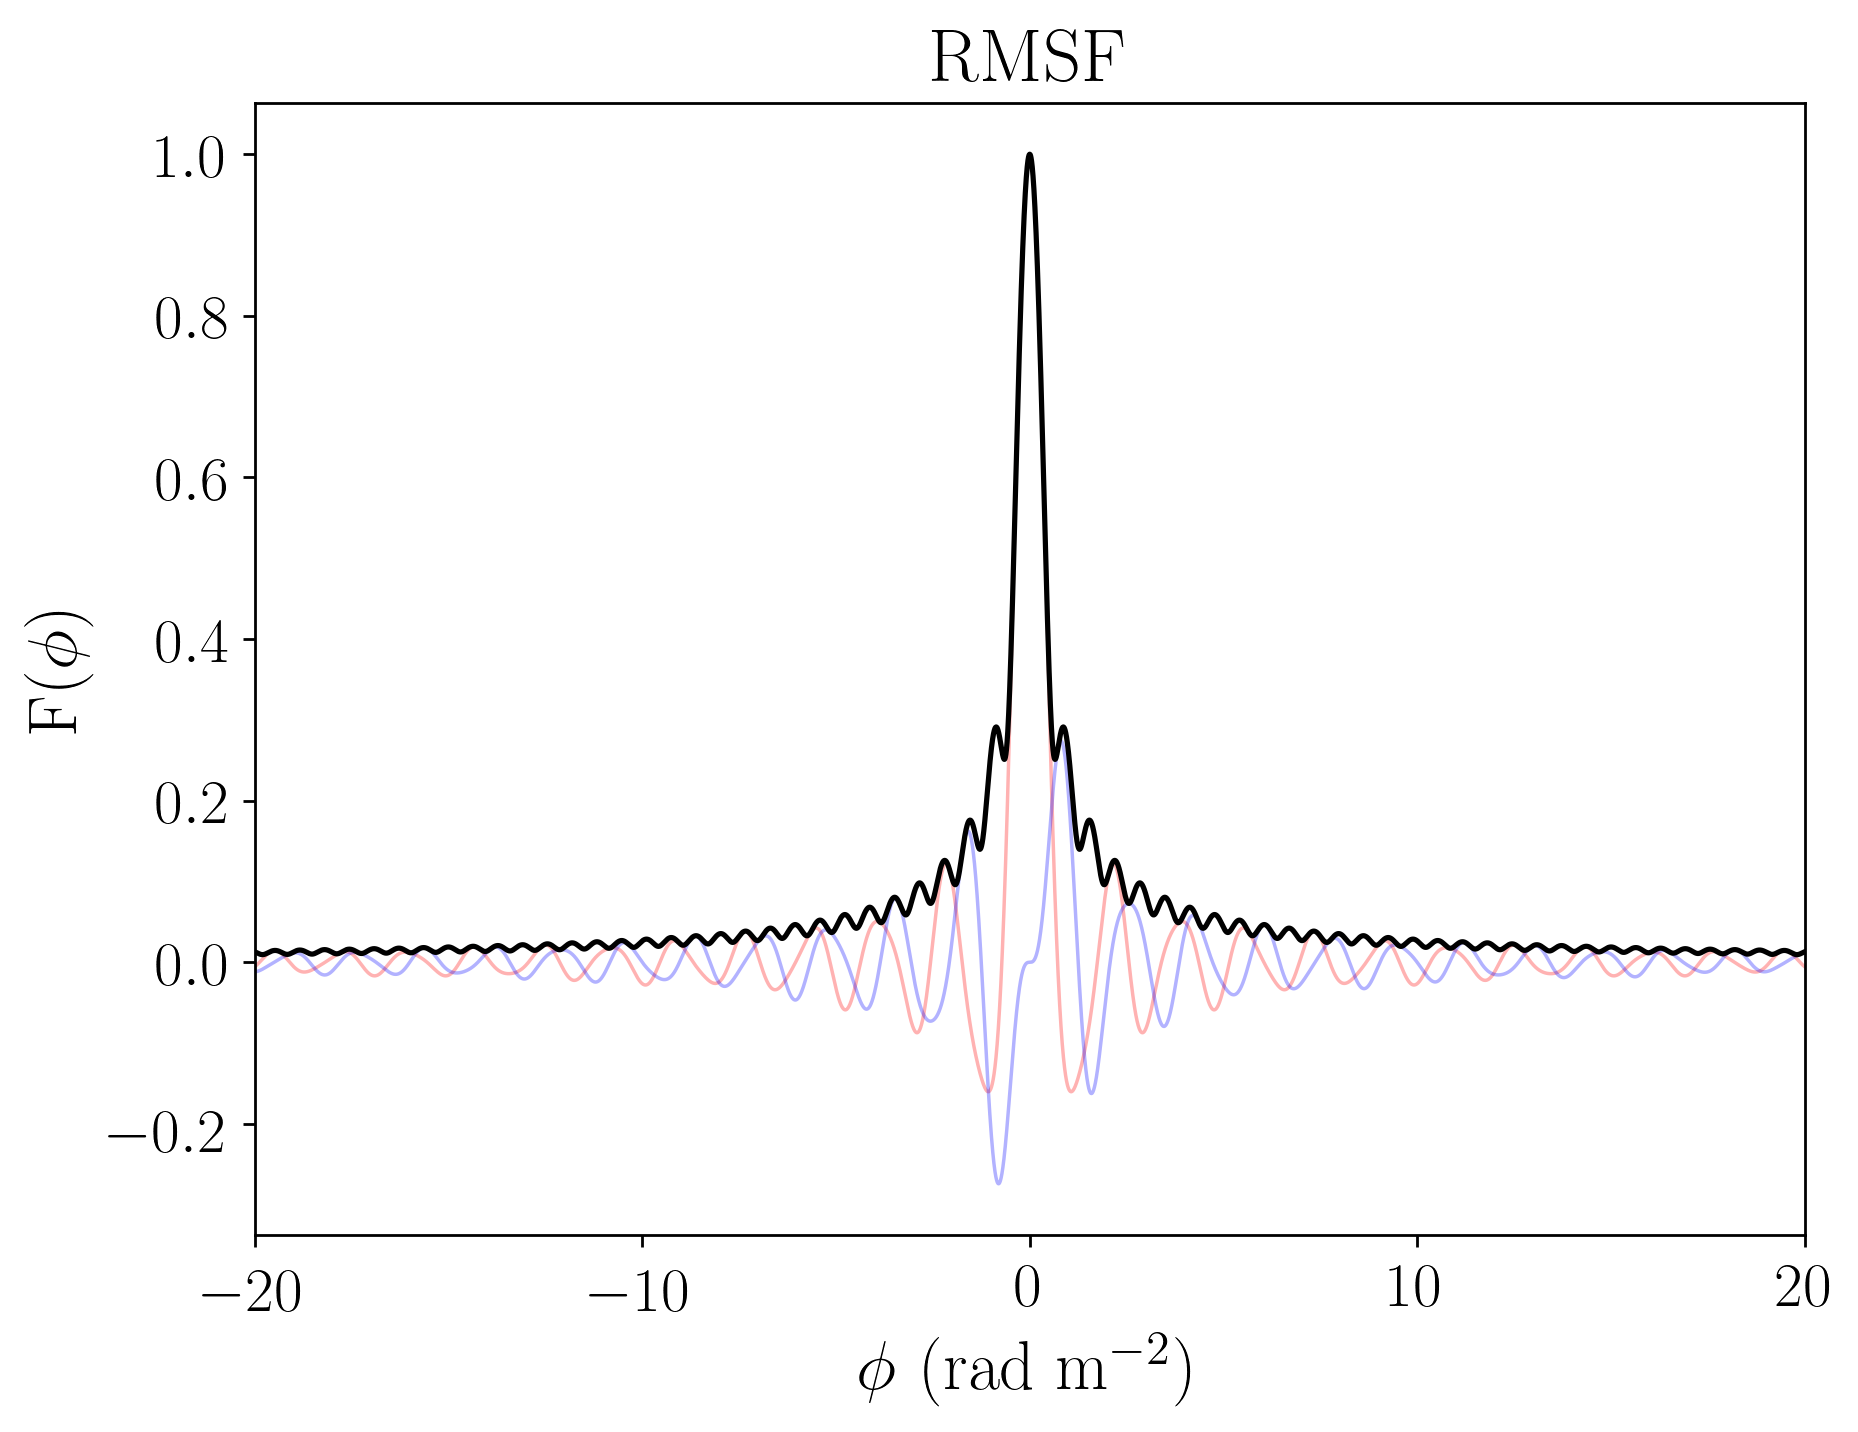

In [3]:
# Calculate and print observation and Faraday spectrum numbers
freq = np.linspace(FREQLO, FREQHI, num=NCHAN, endpoint=True)
freqres = freq[1]-freq[0]
print "* Frequency range = %f - %f MHz"%(np.min(freq),np.max(freq))
print "Frequency resolution = %f MHz"%(freqres)
lam=(299.792458/freq)
lam2=lam**2
l02=np.mean(lam2)
print "* Wavelength range = %f - %f m"%(np.min(lam),np.max(lam))
print "Wavelength squared range = %f - %f m^2"%(np.min(lam2),np.max(lam2))
print "Wavelength squared average = %f m^2"%(l02)

deltaphi = 3.8/(np.max(lam2)-np.min(lam2))
maxscale = np.pi/np.min(lam2)
phimax = np.abs(np.sqrt(3)/np.min(np.diff(lam2)))
phimax_av =  np.abs(np.sqrt(3)/np.median(np.diff(lam2)))
print '* FWHM of RMSF = %f rad/m^2'%(deltaphi)
print 'Maximum RM scale ~%f rad/m^2'%(maxscale) 
print 'Maximum RM accessible is %f (lower limit), %f (average) rad/m**2'%(phimax,phimax_av)
if np.min(lam2) >= (np.max(lam2)-np.min(lam2)):
    print 'Warning: Faraday thick structures will not be resolved'
    
phi = np.arange(PHIMIN,PHIMAX+PHIRES,PHIRES)
print "* Faraday spectrum range = %f - %f rad/m^2"%(PHIMIN,PHIMAX)
print "Faraday spectrum resolution = %f rad/m^2"%(PHIRES)    

#Calculate theoretical RMSF
K=1.0/len(lam2)
R = np.array([])
for i in xrange(0,len(phi)):
    Rreal = K*(np.sum(np.cos(-2.*phi[i]*(lam2-l02))))
    Rimag = K*(np.sum(np.sin(-2.*phi[i]*(lam2-l02))))
    R = np.append(R,np.complex(Rreal,Rimag))

#plot RMSF
fig = plt.figure(figsize=(8,6), dpi=250)
params = {'text.usetex': True, 'axes.labelsize': 18, 'font.size': 18}
plt.rcParams.update(params)

plt.plot(phi,np.real(R),'r-',lw=1.,alpha=0.3)
plt.plot(phi,np.imag(R),'b-',lw=1.,alpha=0.3)
plt.plot(phi,np.abs(R),'k-',lw=1.5)
plt.xlabel('$\mathrm{\phi~(rad~m^{-2})}$',fontsize=20)
plt.ylabel('$\mathrm{F}(\phi)$ ',fontsize=20)
plt.xlim([np.min(phi),np.max(phi)])
plt.title('$\mathrm{RMSF}$')
#plt.ylim([-0.025,1.025])
#plt.savefig('plot_RMSF.pdf',bbox_inches='tight')
plt.show()

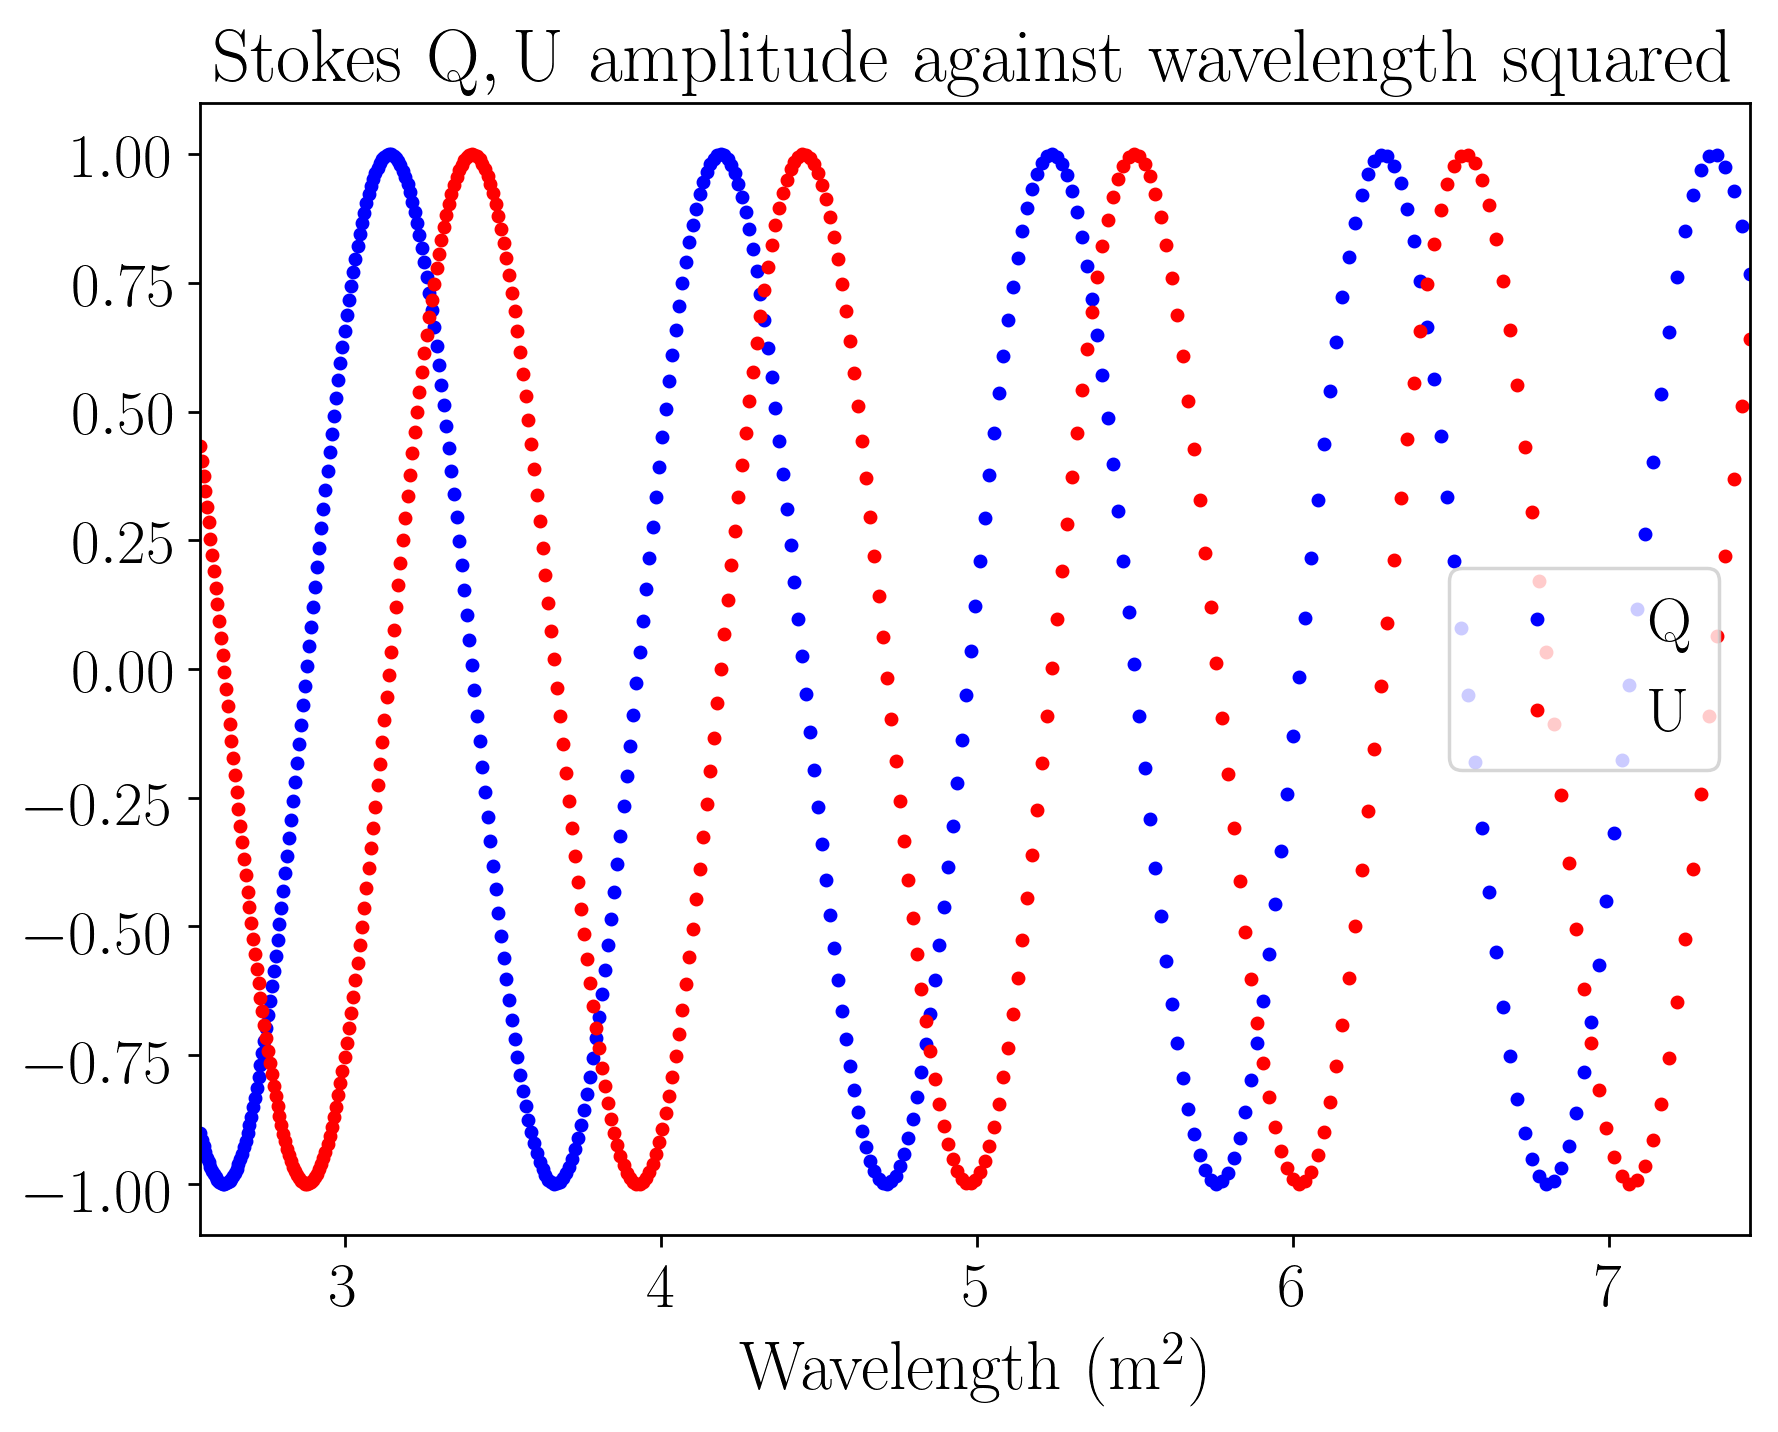

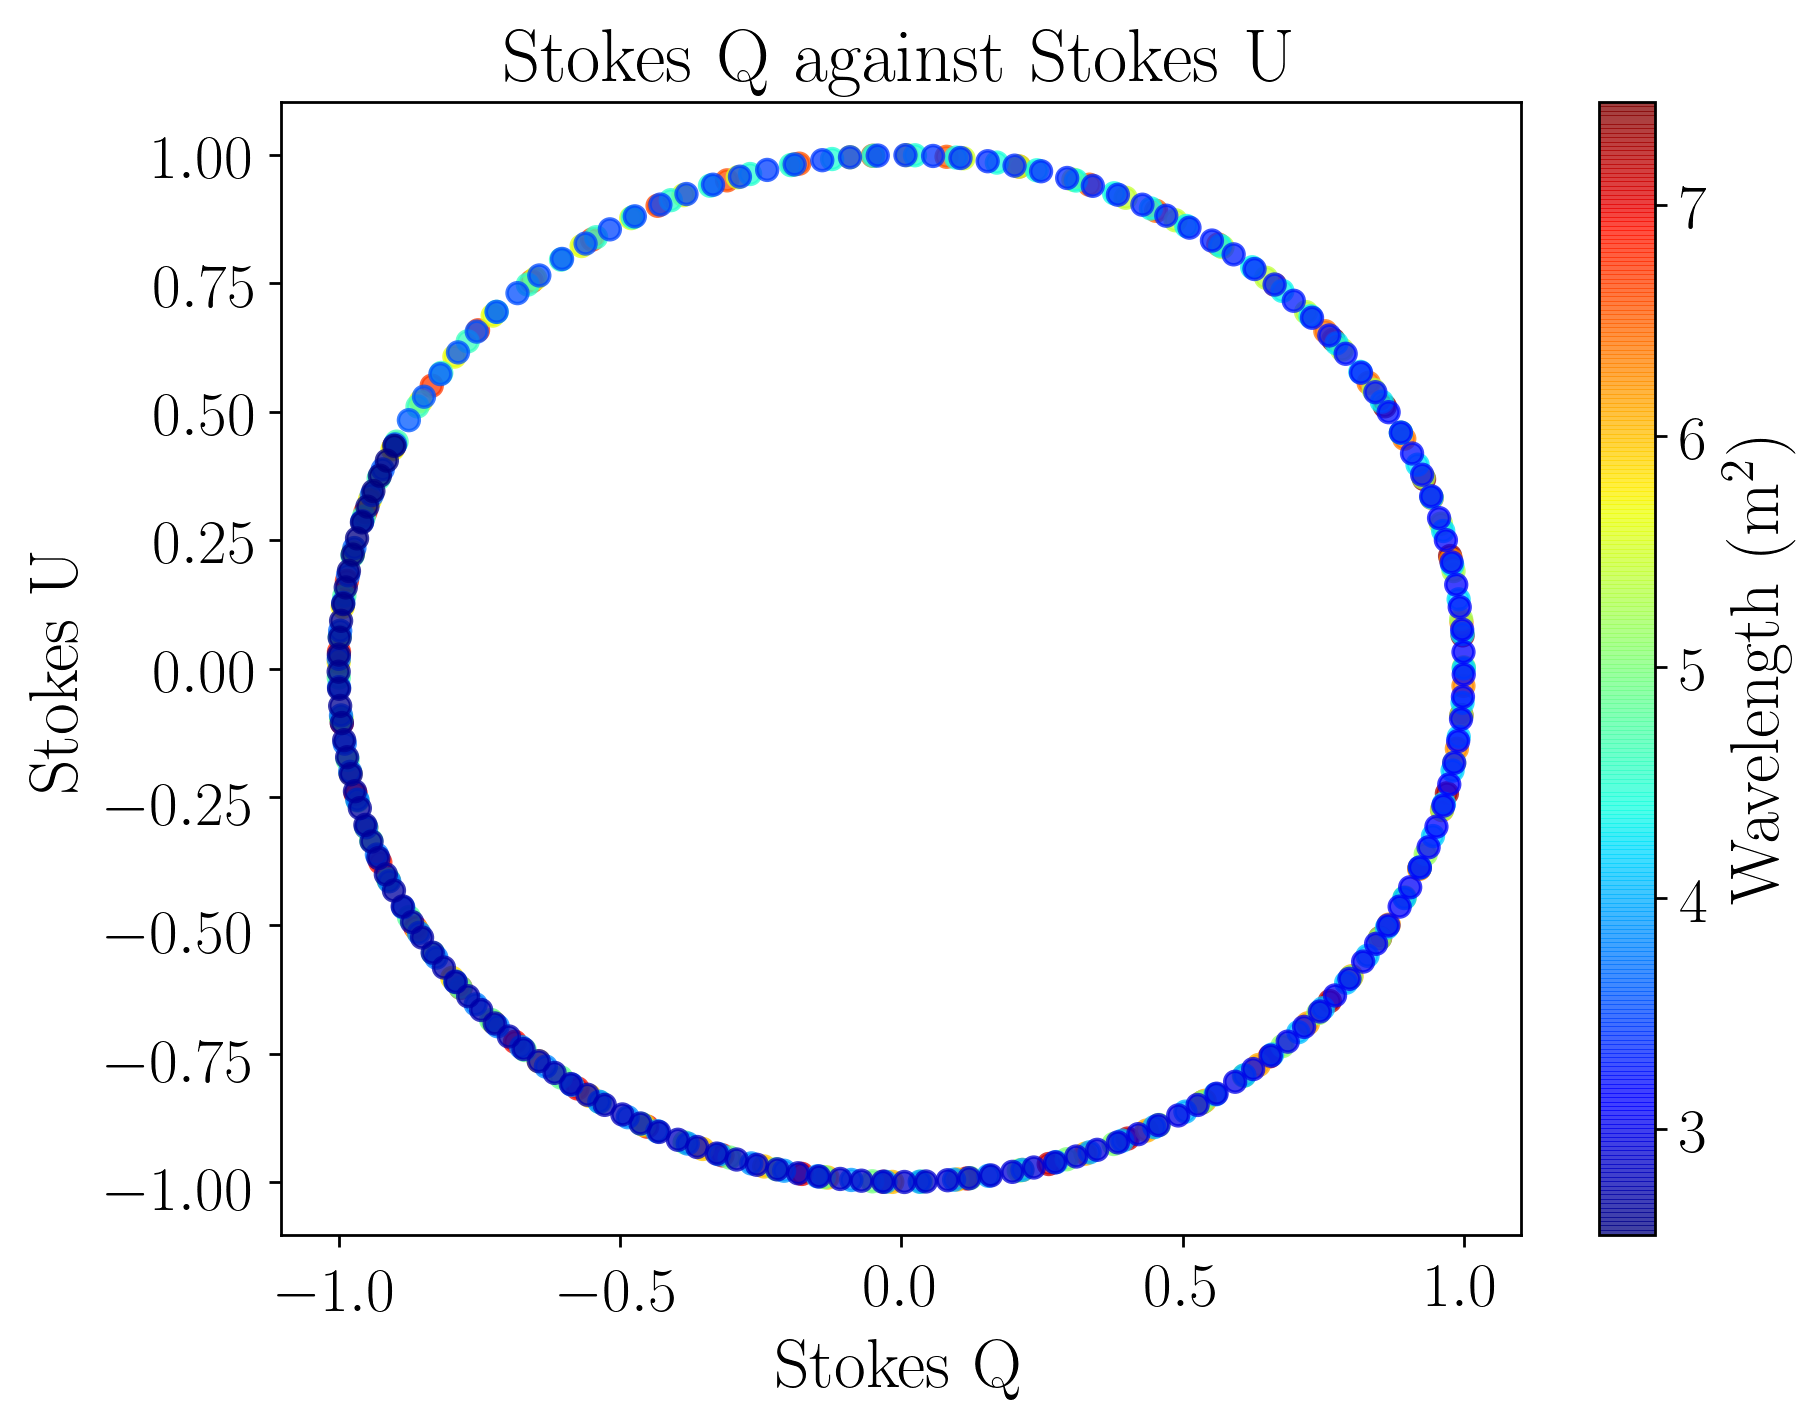

In [4]:
# Simulate basic data 
#complex pol vector -> basic sin functions normalised to 1 and no offsets
p_bas = np.exp(np.complex(0,1)*2*RM*lam2)
q_bas = np.real(p_bas) #q_bas = np.cos(2*RM*lam2)
u_bas = np.imag(p_bas) #u_bas = np.sin(2*RM*lam2)


#plot Stokes Q,U data versus wavelength squared
fig = plt.figure(figsize=(8,6), dpi=250)
params = {'text.usetex': True, 'axes.labelsize': 18, 'font.size': 18}
plt.rcParams.update(params)

plt.plot(lam2,q_bas,'b.',lw=1.5,label='$\mathrm{Q}$')
plt.plot(lam2,u_bas,'r.',lw=1.5,label='$\mathrm{U}$')
plt.xlim([np.min(lam2),np.max(lam2)])
plt.xlabel('$\mathrm{Wavelength~(m^{2})}$',fontsize=20)
#plt.ylabel('$\mathrm{Amplitude}',fontsize=20)
plt.legend(loc='best',numpoints=1)
plt.title('$\mathrm{Stokes~Q,U~amplitude~against~wavelength~squared}$')
#plt.savefig('plot_QU-Lambda2_bas.pdf',bbox_inches='tight')
plt.show()


#plot Stokes Q,U data
fig = plt.figure(figsize=(8,6), dpi=250)
params = {'text.usetex': True, 'axes.labelsize': 18, 'font.size': 18}
plt.rcParams.update(params)

im = plt.scatter(q_bas,u_bas, c=lam2, cmap=plt.cm.jet, alpha=0.75)
plt.xlabel('$\mathrm{Stokes~Q}$',fontsize=20)
plt.ylabel('$\mathrm{Stokes~U}$',fontsize=20)
cbar = fig.colorbar(im)
cbar.ax.set_ylabel('$\mathrm{Wavelength~(m^{2})}$',fontsize=20)
plt.title('$\mathrm{Stokes~Q~against~Stokes~U}$')
#plt.savefig('plot_Q-U_bas.pdf',bbox_inches='tight')
plt.show()


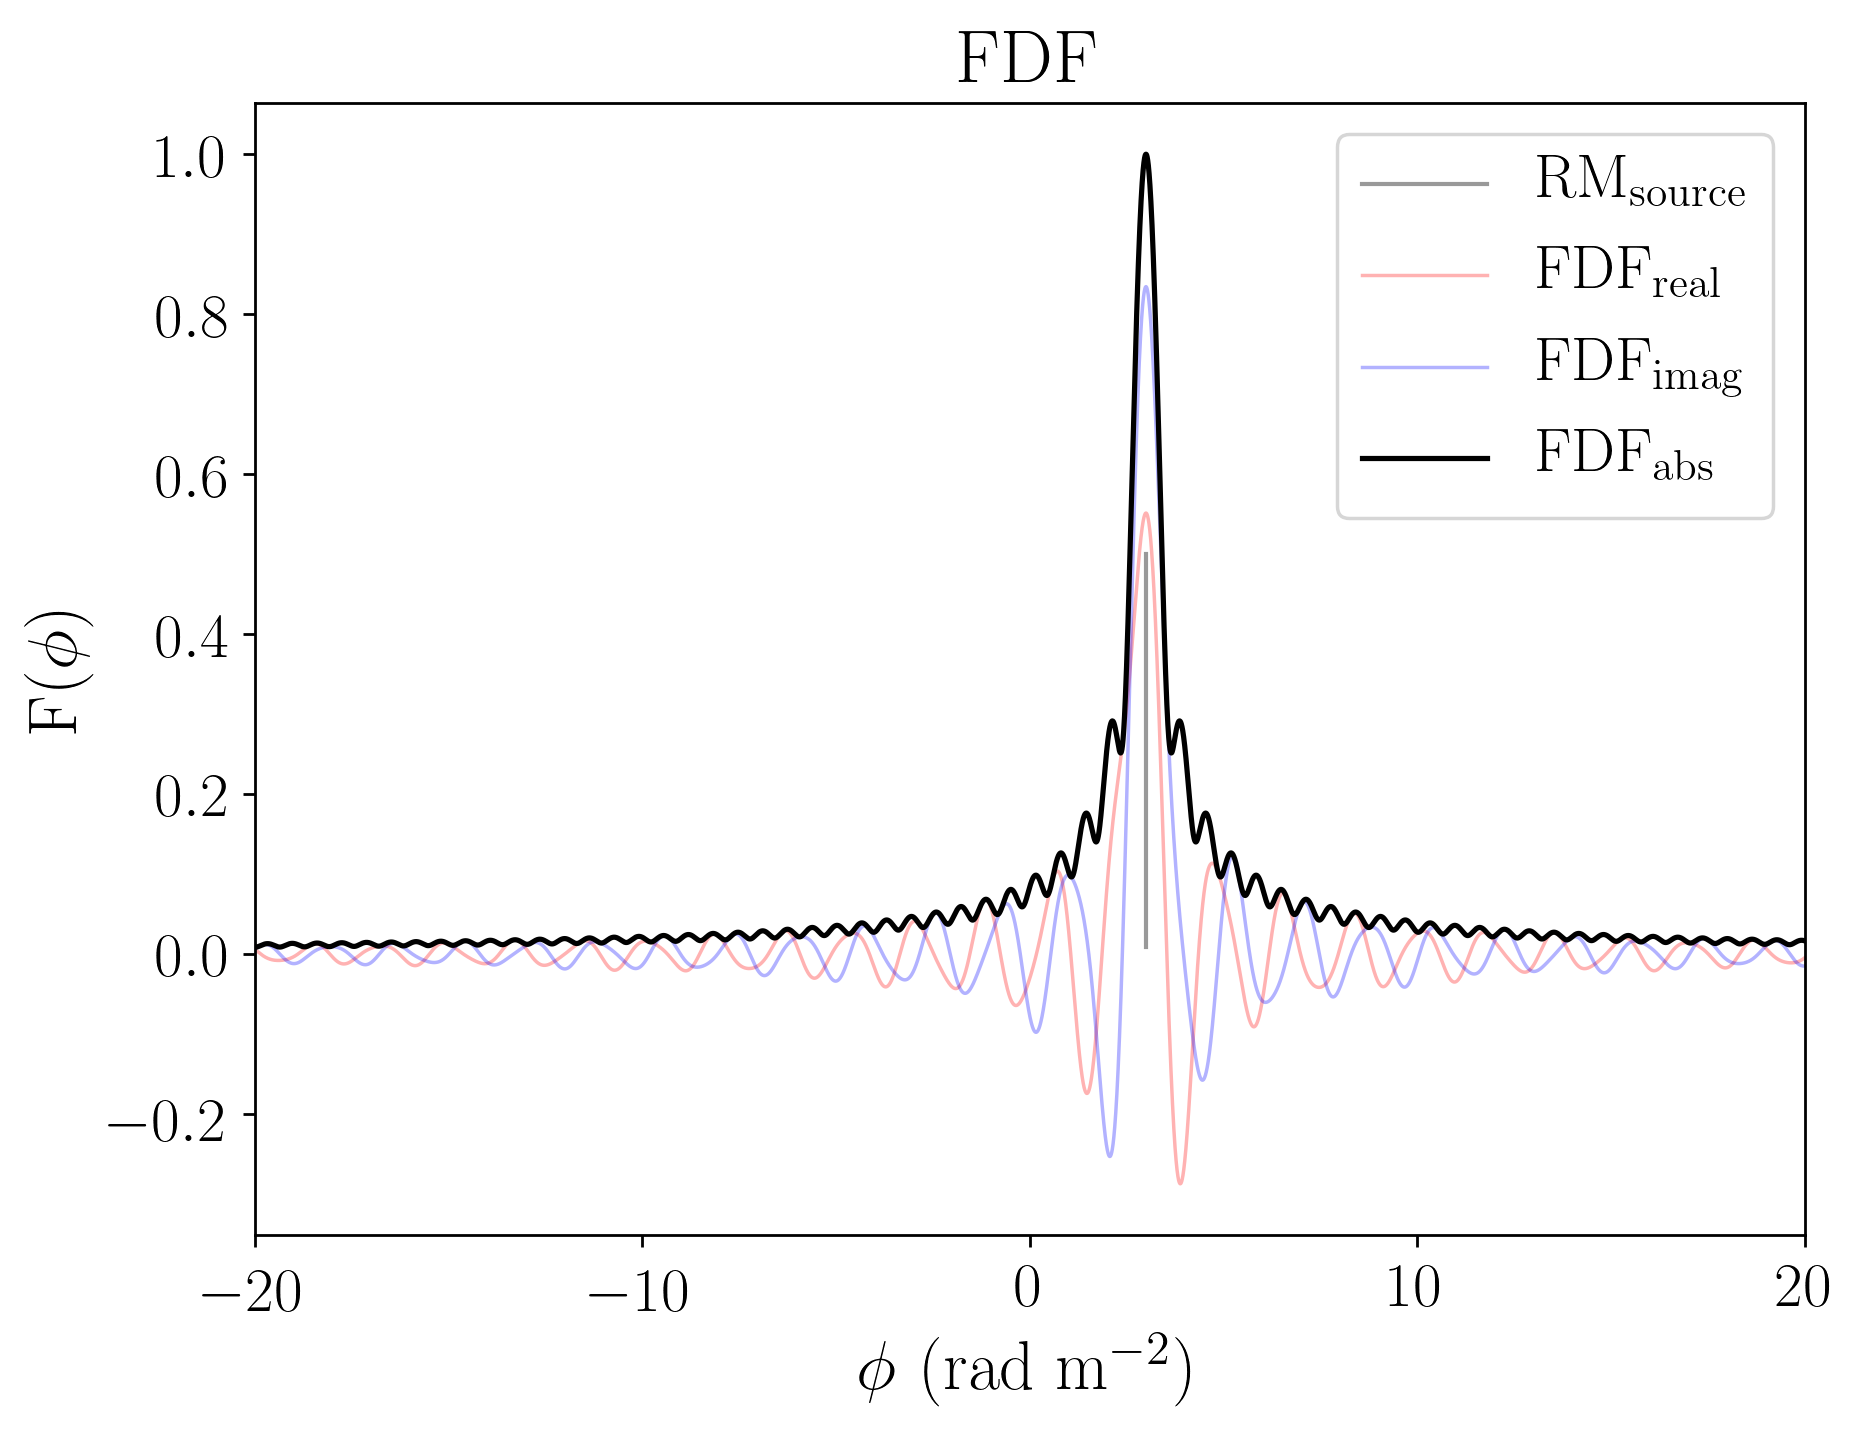

In [5]:
# Run RM-synthesis 

FDF = np.array([])
for i in xrange(0,len(phi)):
    FDFi = K*(np.sum((np.complex(1,0)*q_bas+np.complex(0,1)*u_bas)*np.exp(np.complex(0,1)*-2.*phi[i]*(lam2-l02))))
    FDF = np.append(FDF,FDFi)

    
#plot FDF
fig = plt.figure(figsize=(8,6), dpi=250)
params = {'text.usetex': True, 'axes.labelsize': 18, 'font.size': 18}
plt.rcParams.update(params)

plt.plot([RM,RM],[np.min(np.abs(FDF)),0.5*np.max(np.abs(FDF))],'-',color='0.6',lw=1.2,label='$\mathrm{RM_{source}}$')
plt.plot(phi,np.real(FDF),'r-',lw=1.,alpha=0.3,label='$\mathrm{FDF_{real}}$')
plt.plot(phi,np.imag(FDF),'b-',lw=1.,alpha=0.3,label='$\mathrm{FDF_{imag}}$')
plt.plot(phi,np.abs(FDF),'k-',lw=1.5,label='$\mathrm{FDF_{abs}}$')
plt.xlabel('$\mathrm{\phi~(rad~m^{-2})}$',fontsize=20)
plt.ylabel('$\mathrm{F}(\phi)$ ',fontsize=20)
plt.xlim([np.min(phi),np.max(phi)])
#plt.ylim([-0.025,1.025])
plt.legend(loc='best',numpoints=1)
plt.title('$\mathrm{FDF}$')
#plt.savefig('plot_FDF_bas.pdf',bbox_inches='tight')
plt.show()


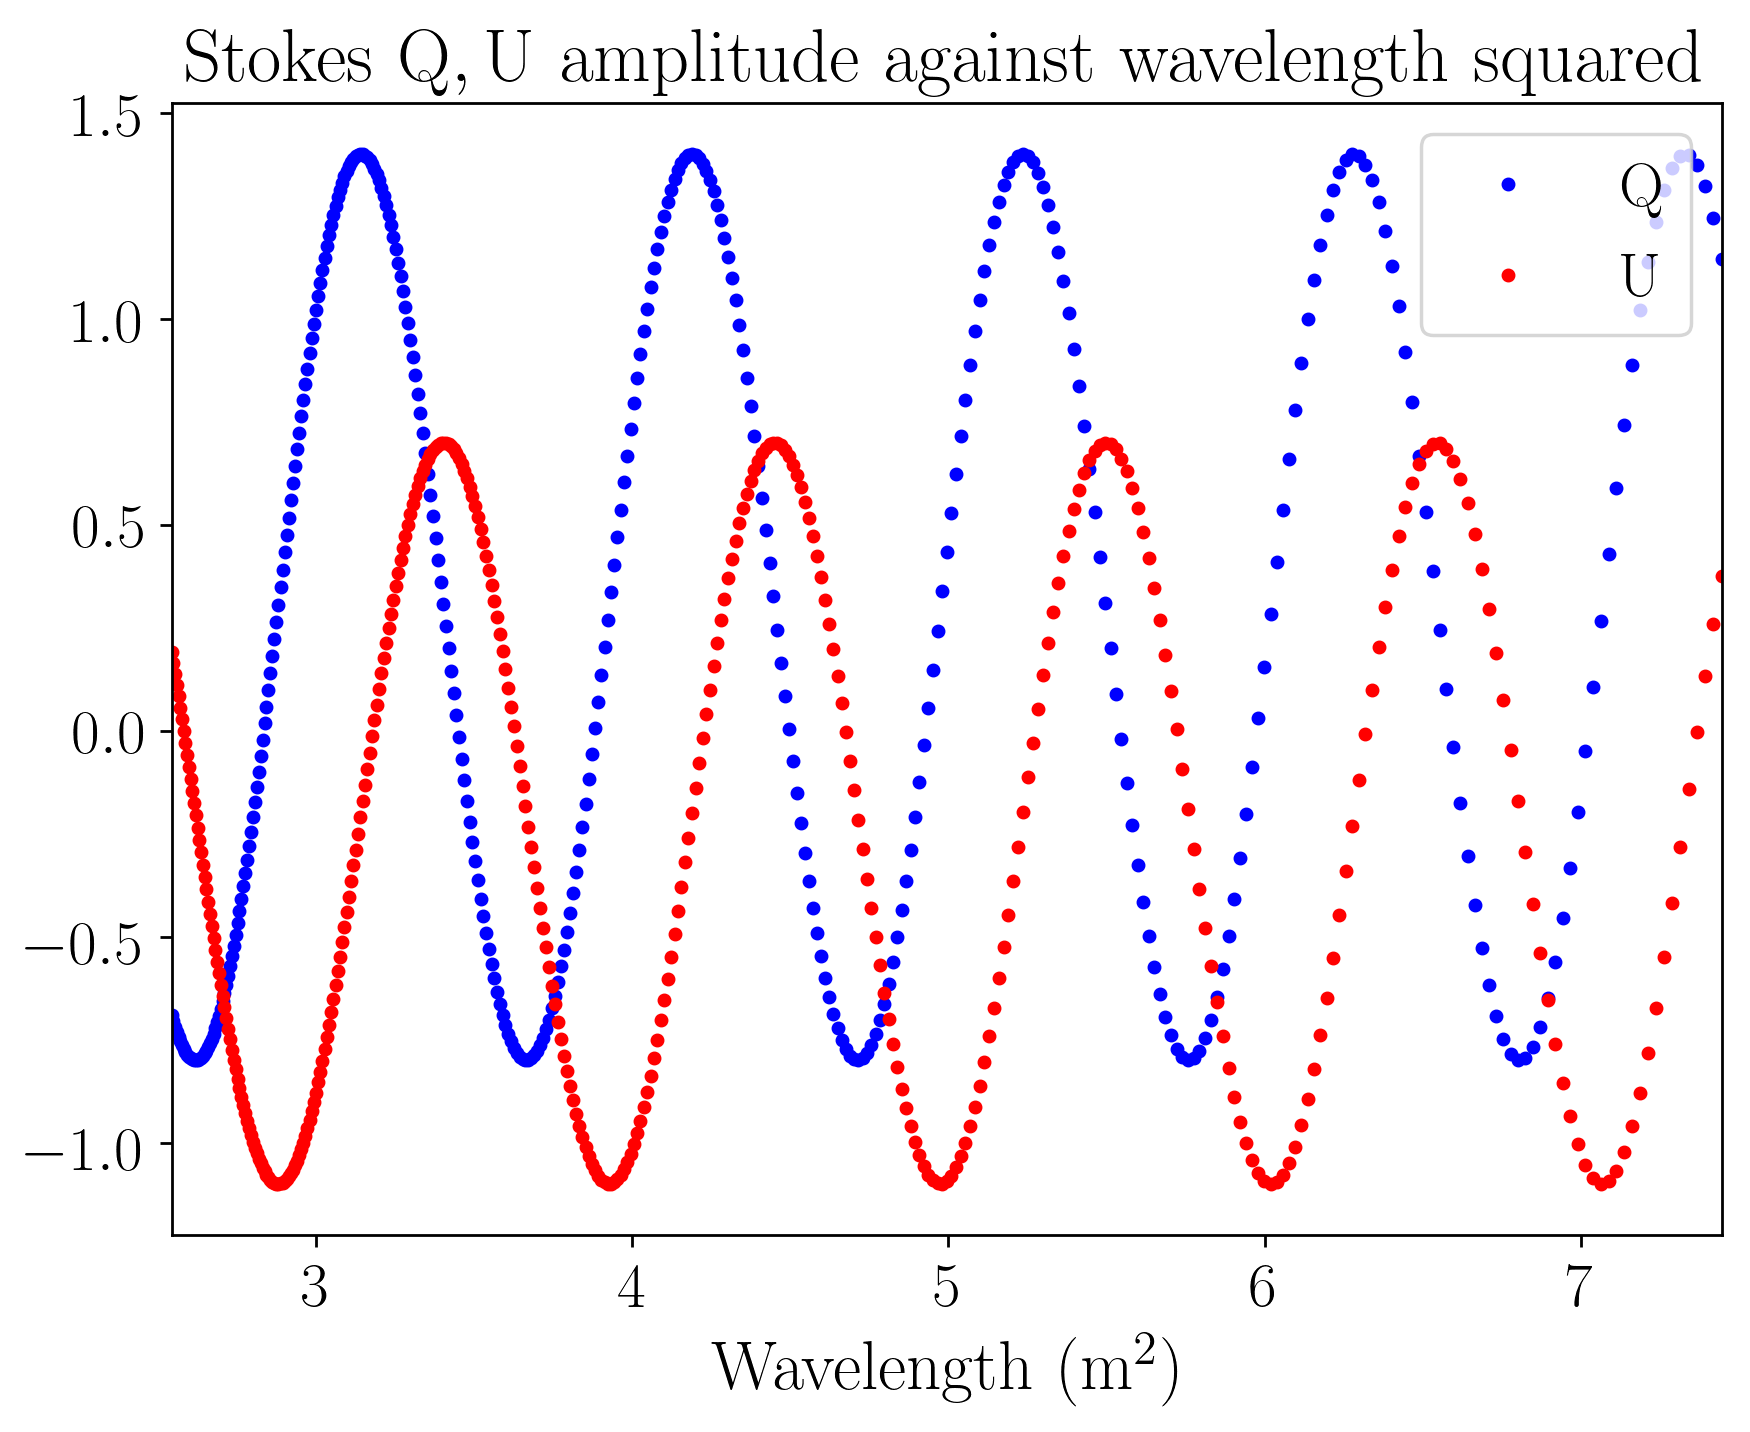

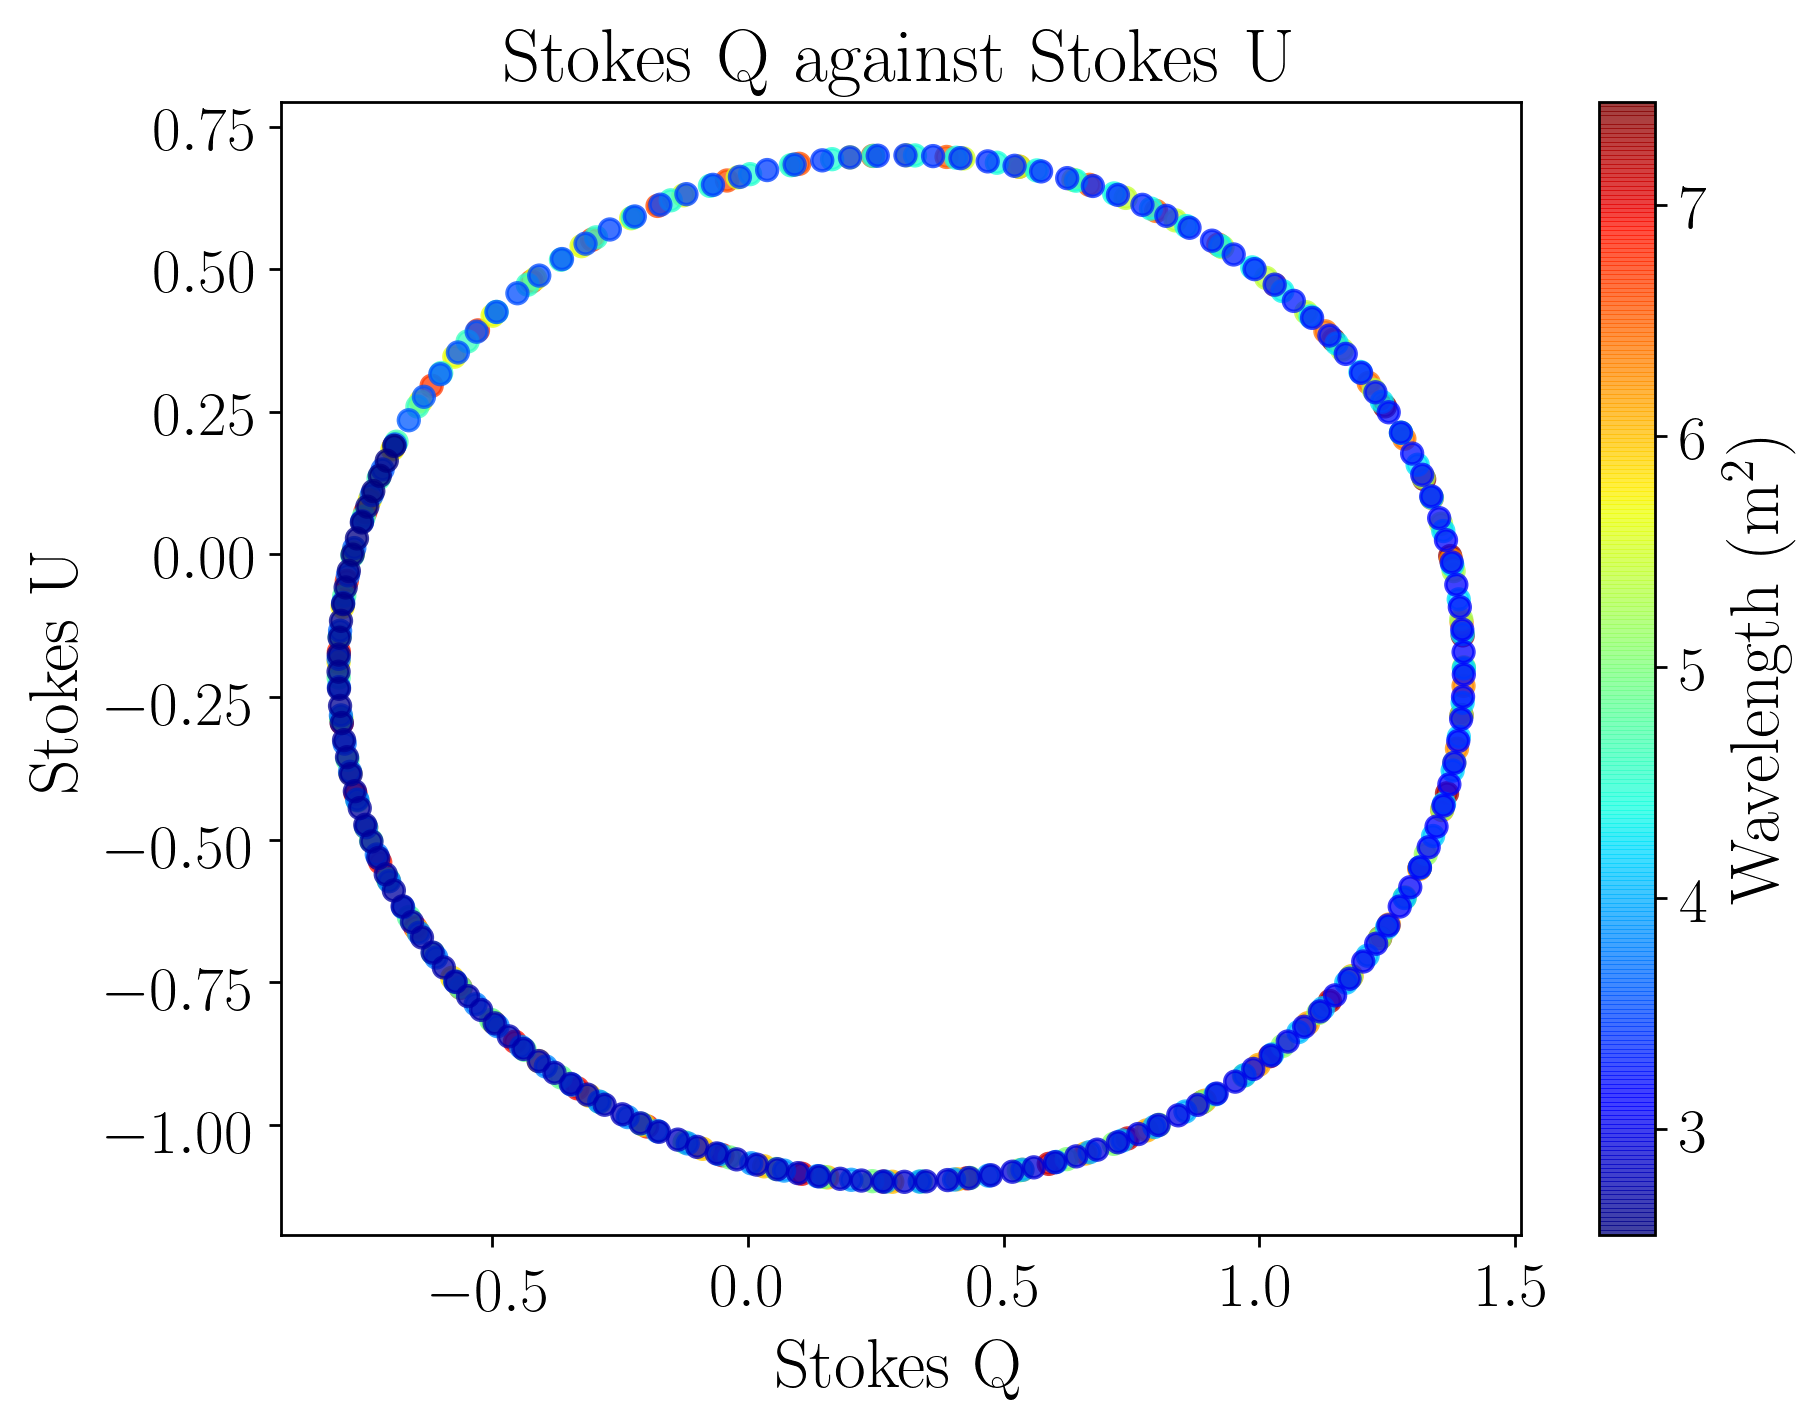

In [10]:
##### ***INPUT***: extra options for data ######
Q_AMP = 1.1   #Stokes Q amplitude# = 1 above#
U_AMP = 0.9   #Stokes U amplitude# = 1 above# - difference in Q,U amplitude causes mirrored peak at -1*RM
Q_MED = 0.3   #Stokes Q median# = 0 above#
U_MED = -0.2   #Stokes U median# = 0 above# - non-zero Q,U median causes 'instrumental' peak at 0 rad/m^2


#sin functions with input amplitude and offsets
#p_out = 
q_out = Q_AMP*np.cos(2*RM*lam2)+Q_MED
u_out = U_AMP*np.sin(2*RM*lam2)+U_MED


#plot Stokes Q,U data versus wavelength squared
fig = plt.figure(figsize=(8,6), dpi=250)
params = {'text.usetex': True, 'axes.labelsize': 18, 'font.size': 18}
plt.rcParams.update(params)

plt.plot(lam2,q_out,'b.',lw=1.5,label='$\mathrm{Q}$')
plt.plot(lam2,u_out,'r.',lw=1.5,label='$\mathrm{U}$')

plt.xlim([np.min(lam2),np.max(lam2)])
plt.xlabel('$\mathrm{Wavelength~(m^{2})}$',fontsize=20)
#plt.ylabel('$\mathrm{Amplitude}',fontsize=20)
plt.legend(loc='best',numpoints=1)
plt.title('$\mathrm{Stokes~Q,U~amplitude~against~wavelength~squared}$')
#plt.savefig('plot_QU-Lambda2_out.pdf',bbox_inches='tight')
plt.show()


#plot Stokes Q,U data
fig = plt.figure(figsize=(8,6), dpi=250)
params = {'text.usetex': True, 'axes.labelsize': 18, 'font.size': 18}
plt.rcParams.update(params)

im = plt.scatter(q_out,u_out, c=lam2, cmap=plt.cm.jet, alpha=0.75)
plt.xlabel('$\mathrm{Stokes~Q}$',fontsize=20)
plt.ylabel('$\mathrm{Stokes~U}$',fontsize=20)
cbar = fig.colorbar(im)
cbar.ax.set_ylabel('$\mathrm{Wavelength~(m^{2})}$',fontsize=20)
plt.title('$\mathrm{Stokes~Q~against~Stokes~U}$')
#plt.savefig('plot_Q-U_out.pdf',bbox_inches='tight')
plt.show()


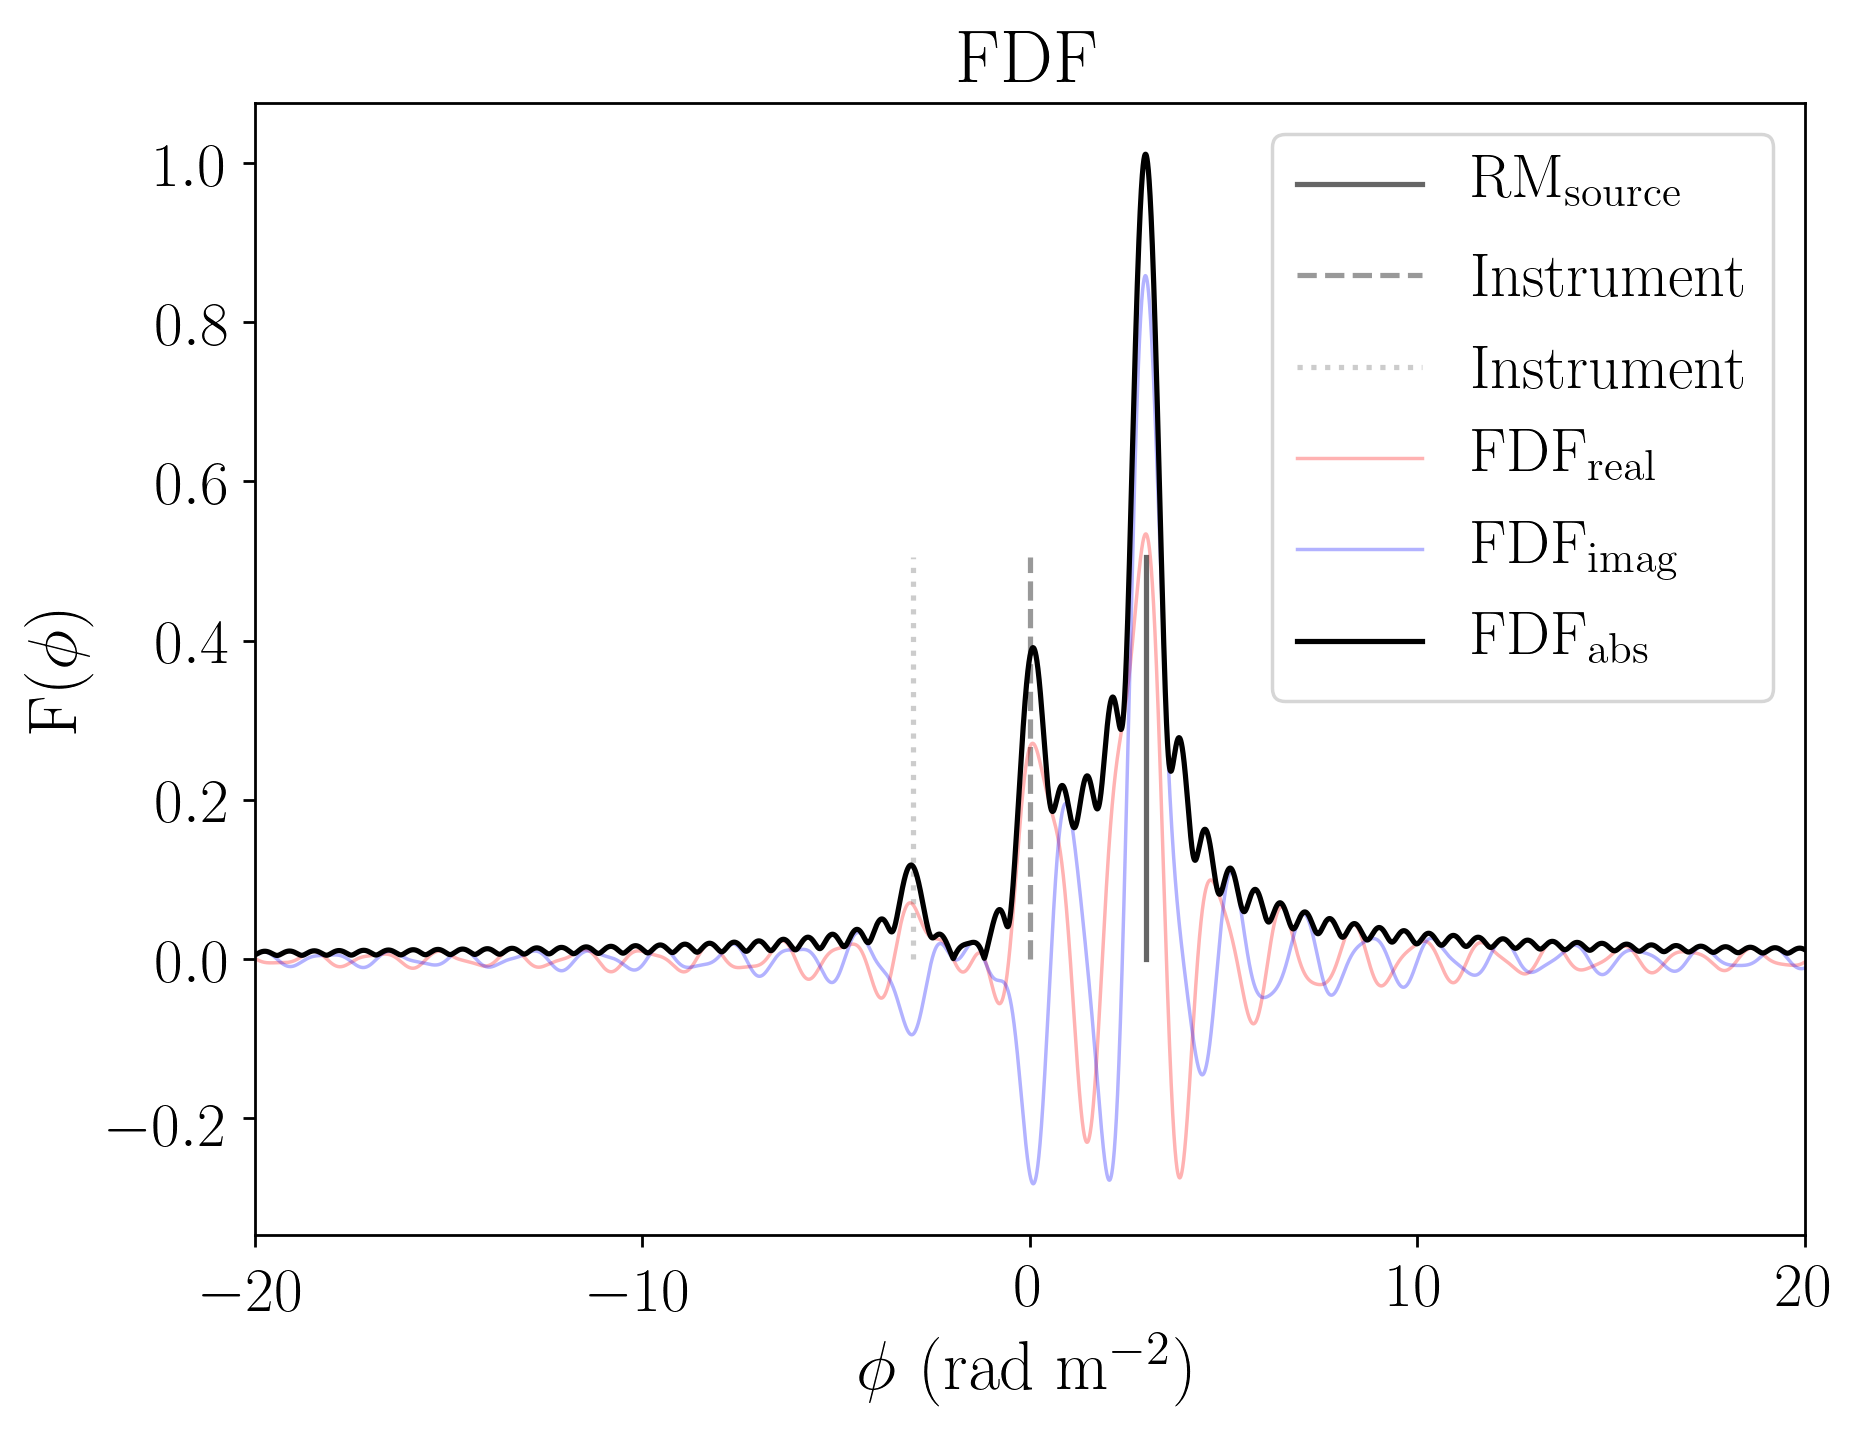

In [11]:
# Run RM-synthesis 

FDF = np.array([])
for i in xrange(0,len(phi)):
    FDFi = K*(np.sum((np.complex(1,0)*q_out+np.complex(0,1)*u_out)*np.exp(np.complex(0,1)*-2.*phi[i]*(lam2-l02))))
    FDF = np.append(FDF,FDFi)

#Expected max of FDF function ## !check!
F_max = 0.5*(np.max(np.concatenate((q_out,u_out),axis=None))-np.min(np.concatenate((q_out,u_out),axis=None)))
    

#plot FDF
fig = plt.figure(figsize=(8,6), dpi=250)
params = {'text.usetex': True, 'axes.labelsize': 18, 'font.size': 18}
plt.rcParams.update(params)

#plot lines
#x constants: RM, 0 -1*RM ##
plt.plot([RM,RM],[np.min(np.abs(FDF)),0.5*np.max(np.abs(FDF))],'-',color='0.4',lw=1.5,label='$\mathrm{RM_{source}}$')
plt.plot([0,0],[np.min(np.abs(FDF)),0.5*np.max(np.abs(FDF))],ls='dashed',color='0.6',lw=1.5,label='$\mathrm{Instrument}$')
plt.plot([-1*RM,-1*RM],[np.min(np.abs(FDF)),0.5*np.max(np.abs(FDF))],ls='dotted',color='0.8',lw=1.5,label='$\mathrm{Instrument}$')

#y constants: expected amplitudes
#plt.plot([np.min(phi),np.max(phi)],[F_max,F_max],'--',color='0.5',lw=1.5,alpha=0.5)

#Plot spectrum
plt.plot(phi,np.real(FDF),'r-',lw=1.,alpha=0.3,label='$\mathrm{FDF_{real}}$')
plt.plot(phi,np.imag(FDF),'b-',lw=1.,alpha=0.3,label='$\mathrm{FDF_{imag}}$')
plt.plot(phi,np.abs(FDF),'k-',lw=1.5,label='$\mathrm{FDF_{abs}}$')
plt.xlabel('$\mathrm{\phi~(rad~m^{-2})}$',fontsize=20)
plt.ylabel('$\mathrm{F}(\phi)$ ',fontsize=20)
plt.xlim([np.min(phi),np.max(phi)])
#plt.ylim([-0.025,1.025])
plt.legend(loc='best',numpoints=1)
plt.title('$\mathrm{FDF}$')
#plt.savefig('plot_FDF_out.pdf',bbox_inches='tight')
plt.show()
